<img src="https://www.skywin.be/sites/default/files/logo-membres/vki_logo_blue_rectangular.jpg" style="float: center; margin-right: 2px;" width=400>

# TSC 5 - Object Oriented Programming (OOP) with Python 
#### L. Schena, J. Christophe, F. Torres, J. Dominique and M. A. Mendez



# Table of Contents
1. [Introduction](#Introduction)
2. [Classes and Objects](#Classes-and-Objects)
3. [Class Attributes](#Class-Attributes)
4. [Encapsulation](#Encapsulation)
5. [Reusing Classes: Inheritance and Abstraction](#Reusing-Classes:-Inheritance-and-Abstraction)
6. [Data Classes](#Data-Classes)
7. [Do's and Don'ts](#Do's-and-Don'ts)
8. [Recap Exercise](#Recap-Exercise)
9. [Summary](#Summary)
12. [References](#References)

## 1. Introduction

Object Oriented Programming (OOP) is a programming paradigm that uses _objects_ to design applications. Instead of procedural programming, in which you create a list of instructions and functions that the code executes in a sequential way, OOP focuses on creating objects that can handle both data and functions, which can be used to create re-usable and flexible code. 

**Basic Terminology**: 
- **Class**: a blueprint for creating objects. Python: `class` keyword.
- **Object**: an instance of a class.
- **Method**: a function defined in a class.
- **Attribute**: a variable defined in a class.

## 2. Classes and Objects

To define a class, you use the `class` keyword, followed by the class name and a colon. The class body is indented, and it can contain methods and attributes. 

In [1]:
import numpy as np 

class DataProcessor: 
    """
    A class to process data.
    """
    name = 'DataProcessor' # class attribute
    
    def __init__(self, data: np.array = None): # constructor
        self.data = data # instance attribute (passed as argument)
        
    def mean(self): # method
        return sum(self.data)/len(self.data)

In [2]:
data = np.random.rand(10)

In [3]:
dp = DataProcessor(data)

In [5]:
dp.name

'DataProcessor'

Both data and methods are now encapsulated in the `DataProcessor` class. We can have a look:

In [6]:
np.allclose(dp.data, data)

True

Note that to call a method of a class (i.e. a function defined inside of class's body), you use the dot notation:

In [7]:
dp.mean()

np.float64(0.4043095976706249)

You can change the value of an attribute of the class, and this will affect the class's behavior:

In [8]:
dp.data = np.ones(10)
dp.mean()

np.float64(1.0)

And you can initialize a new instance of the class with different arguments (re-using the same class definition): 

In [9]:
dp2 = DataProcessor(np.random.rand(10))
dp2.mean()

np.float64(0.3696430351745422)

## Exercise 2.1 - Keeping track of the number of instances

Class attributes are variable created outside of any specific method inside of a class. These are linked to the class itself, and not to any particular instance or object of the class. If this class attribute changes, then it will affect all other instances of the class. 

In this exercise, we will develop a class that keeps track of the number of instances created out of it. Let's upagrade the class `DataProcessor` to enable this feature.

In [ ]:
class DataProcessor: 
    """
    A class to process data.
    """
    name = 'DataProcessor' # class attribute
    n_instances = 0
    data = None
    
    def __init__(self, data): # constructor
        self.data = data # instance attribute (passed as argument)
        DataProcessor.n_instances += 1 # increment the number of instances (attribute of the class)
                
    def mean(self): # method
        return sum(self.data)/len(self.data)
    
    @staticmethod
    def mean_(x):
        return sum(x)/len(x)
    
print('Number of active instances:', DataProcessor.n_instances)

Number of active instances: 0


In [ ]:
dp1 = DataProcessor(np.random.rand(10))
dp1.mean()
dp1.mean_()

In [11]:
dp1 = DataProcessor(np.random.rand(10))
dp2 = DataProcessor(np.random.rand(10))
dp3 = DataProcessor(np.random.rand(10))

print('Number of active instances:', DataProcessor.n_instances)

Number of active instances: 3


In [17]:
dp2.data 

array([0.57171107, 0.8472459 , 0.8370453 , 0.97211026, 0.1804253 ,
       0.84375626, 0.26925325, 0.13613946, 0.75071126, 0.36324863])

In [16]:
dp3.data = np.ones(3)
print(dp3.data)

[1. 1. 1.]


This information propagates through all the created instances of the class. In fact: 

In [12]:
dps = [dp1, dp2, dp3]

for dp in dps:
    print('Number of instances of the class:', dp.n_instances)

Number of instances of the class: 3
Number of instances of the class: 3
Number of instances of the class: 3


## 3. Class Attributes 

Class attributes are variables that are shared by all instances of a class. They are defined within the class definition, but outside of any class method. They are specific to its containing instance. 

**Note:** you can define attributes dynamically (i.e. outside of the class definition). However, this is not recommended: better to define all your variables in the class ```__init__``` method, to avoid confusion, increase readability and ease debugging.

Let's define a generic class to illustrate this concept, for instance a class which encodes all key information about VKI wind tunnels:

In [18]:
class VKI_WindTunnel:
    """
    A class to store information about VKI wind tunnels.
    """
    location = 'the von Karman Institute for Fluid Dynamics' # class attribute
    nbr_wind_tunnels = 0 # class attribute
    
    def __init__(self, max_v, test_section_h, test_section_w, TI, length, name): # constructor
        self.max_v = max_v # instance attribute
        self.test_section_h = test_section_h # instance attribute
        self.test_section_w = test_section_w # instance attribute
        self.TI = TI # instance attribute
        self.length = length # instance attribute
        self.name = name # instance attribute
        
        VKI_WindTunnel.nbr_wind_tunnels += 1 # increment the number of wind tunnels (attribute of the class)

In [ ]:
L1 = VKI_WindTunnel(60, 2, 3, 0.3, 4.5, 'L1-B')
L2B = VKI_WindTunnel(25, 0.35, 0.35, None, 2, 'L2-B')


L1 = VKI_WindTunnel(max_v=1, TI=3)
print('Number of active wind tunnels:', VKI_WindTunnel.nbr_wind_tunnels)

Number of active wind tunnels: 2


Note that you can access the class attributes using the dot notation, and you can change their value:

In [20]:
VKI_WindTunnel.location

'the von Karman Institute for Fluid Dynamics'

In [21]:
VKI_WindTunnel.location = 'the von Karman Institute for Fluid Dynamics, Belgium'
VKI_WindTunnel.location

'the von Karman Institute for Fluid Dynamics, Belgium'

In [23]:
print(L1.location)
print(L2B.location)

the von Karman Institute for Fluid Dynamics, Belgium
the von Karman Institute for Fluid Dynamics, Belgium


## 4. Encapsulation

However, sometimes you may want to avoid users of the class to modify the attributes. In this case, you can **encapsulate** the attribute by using the double underscore `__` before the attribute name. This will make the attribute private, and it will not be accessible from outside the class.

Let's illustrate this with the `VKI_WindTunnel` class, by encapsulating the `location` attribute. 

In [25]:
class VKI_WindTunnel:
    """
    A class to store information about VKI wind tunnels.
    """
    __location = 'the von Karman Institute for Fluid Dynamics' # private class attribute
    nbr_wind_tunnels = 0 # class attribute
    
    def __init__(self, max_v, test_section_h, test_section_w, TI, length, name): # constructor
        self.max_v = max_v # instance attribute
        self.test_section_h = test_section_h # instance attribute
        self.test_section_w = test_section_w # instance attribute
        self.TI = TI # instance attribute
        self.length = length # instance attribute
        self.name = name # instance attribute
        
        VKI_WindTunnel.nbr_wind_tunnels += 1 # increment the number of wind tunnels (attribute of the class)
        
    def get_location(self):
        return VKI_WindTunnel.__location

In [26]:
L1 = VKI_WindTunnel(60, 2, 3, 0.3, 4.5, 'L1-B')

We can still access the location, i.e. the protected attribute:

In [27]:
L1.get_location()

'the von Karman Institute for Fluid Dynamics'

But we cannot change it:

In [28]:
L1.__location = 'Grand Place, Brussels'

In [29]:
L1.get_location()

'the von Karman Institute for Fluid Dynamics'

**Note**: In this case we have ``encapsulated" the attribute, but you can also protect attributes given as an argument in the same way, but using the `__` before the attribute name in the constructor. For instance: 


```python
def __init__(self, max_v, test_section_h, test_section_w, TI, length, name, location): # constructor
    self.__location = location # private instance attribute
```

**Note#2**: If you're using someone else's class and you see an attribute with a double underscore, you should be careful about modifying it outside the class, as this may lead to unexpected behavior.

## 5. Reusing Classes: Inheritance and Abstraction

Classes are objects that contain both variables (attributes) and functions (methods). This section overviews how you can create new classes that are based on existing classes, and how you can use and possibly extend the functionality of the "base" class.

### 5.1 Inheritance

Inheritance is a way to form new classes using classes that have already been defined. The newly formed classes are called **derived classes**, and the classes that we derive from are called **base classes**. Important benefits of inheritance are code reuse and reduction of complexity of a program. The derived classes (descendants) override or extend the functionality of base classes (ancestors).

Let's define a base class to be used in the HR system of the VKI:

In [30]:
class VKIEmployee:
    """
    A class to store information about VKI employees.
    """
    def __init__(self, name, surname):
        self.name = name
        self.surname = surname
    
    def get_name(self):
        return print('Name: {} {}'.format(self.name, self.surname))

We can then define a derived class to re-use this piece of code also for Research Master students (you are employed by the VKI, right?)

In [31]:
class RM(VKIEmployee):
    """
    A class to store information about VKI Research Master students.
    """
    pass 

In [32]:
lorenzo = RM('Lorenzo', 'Schena')
lorenzo.get_name()

Name: Lorenzo Schena


In [33]:
print(isinstance(lorenzo, VKIEmployee))

True


But we can also potentially extend the functionalities of derived classes. Say that we want to keep track of the RM project topic and department. We can do this by defining a new constructor for the derived class (overriding the base class constructor)

In [34]:
class RM(VKIEmployee):
    """
    A class to store information about VKI Research Master students.
    """
    def __init__(self, name, surname, project, department):
        super().__init__(name, surname) # call the base class constructor
        self.project = project
        self.department = department
    
    def get_project(self):
        return print('Project: {}'.format(self.project))
    
    def get_department(self):
        return print('Department: {}'.format(self.department))
    
lorenzo = RM('Lorenzo', 'Schena', 'Control of a Wind Turbine in L1', 'EA')

In [35]:
lorenzo.get_name()
lorenzo.get_project()
lorenzo.get_department()

Name: Lorenzo Schena
Project: Control of a Wind Turbine in L1
Department: EA


Note that as for the ``__init__`` method, you can also override other methods of the base class. For instance we could override the ``get_name`` method to include the project and department information.

In [36]:
class RM(VKIEmployee):
    """
    A class to store information about VKI Research Master students.
    """
    def __init__(self, name, surname, project, department):
        super().__init__(name, surname) # call the base class constructor
        """
        name: str, name of the student
        surname: str, surname of the student
        """
        self.project = project
        self.department = department
        self.coursework = list()
    
    def get_name(self):
        return print('Name: {} {} - Project: {} - Department: {}'.format(self.name, self.surname, self.project, self.department))
    
    def add_coursework(self, course):
        self.coursework.append(course)

In [37]:
lorenzo = RM('Lorenzo', 'Schena', 'Control of a Wind Turbine in L1', 'EA')

In [38]:
courses = ['ELAB1: PIV', 'ELAB2: Boundary Layer', 'ELAB3: Hot-wire Anemometry']

for course in courses:
    lorenzo.add_coursework(course)
    
lorenzo.coursework

['ELAB1: PIV', 'ELAB2: Boundary Layer', 'ELAB3: Hot-wire Anemometry']

Which is not shared by the base class:

In [39]:
miguel = VKIEmployee('Miguel', 'Mendez')

miguel.add_coursework('ELAB1: PIV')

AttributeError: 'VKIEmployee' object has no attribute 'add_coursework'

### 5.2 Abstraction

Abstraction is the concept of object-oriented programming that "shows" only essential attributes and "hides" unnecessary information. Abstract classes can be completely abstract (i.e. they have no implementation) or partially abstract (i.e. they have some implementation). In any case, they force the derived classes to implement (at least) the same abstract methods. 

In [ ]:
from abc import ABC, abstractmethod

class Sensor(ABC):
    """
    An abstract class to store information about sensors.
    """
    def __init__(self, name, board_port, n_samples, log_folder):
        self.name = name
        self.board_port = board_port
        self.n_samples = n_samples
        self.log_folder = log_folder
        
    @abstractmethod
    def read(self) -> (str, int, np.array):
        pass
    
    @abstractmethod
    def plot(self):
        pass
    
    @abstractmethod
    def save_measurement(self):
        pass

Essentially this is a class "template", which will force derived class to have at least those three methods. For instance, we can define a derived class for a temperature sensor:

In [42]:
import matplotlib.pyplot as plt
import time 
from tqdm import tqdm

class PT100(Sensor):
    """
    A class to store information about PT100 temperature sensors.
    """
    def read(self):
        n = 0
        print('Reading temperature from PT100 sensor...')
        
        for _ in tqdm(range(self.n_samples)):
            time.sleep(0.1)
            n += 1
        return print('Measurement completed')
    
    def plot(self):
        print('Plotting temperature from PT100 sensor...')
        
        fig, ax = plt.subplots()
        ax.scatter(range(100), 10*np.random.rand(100))
        ax.set_xlabel('Time (s)')
        ax.set_ylabel('Temperature (C)')
        return plt.show(fig)
    
    def save_measurement(self):
        return print('Saving temperature from PT100 sensor at {}...'.format(self.log_folder))

In [43]:
pt100 = PT100('PT100', 'A0', 10, './')

In [46]:
pt100.read()

Reading temperature from PT100 sensor...


100%|██████████| 10/10 [00:01<00:00,  9.57it/s]

Measurement completed


Ok, now let's have a look at the measurements: 

Plotting temperature from PT100 sensor...


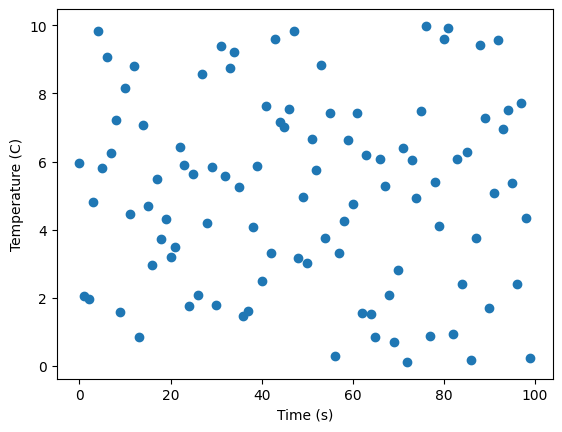

In [47]:
pt100.plot()

Perfect! Exactly what we wanted. Now we can save the measurements:

In [48]:
pt100.save_measurement()

Saving temperature from PT100 sensor at ./...


Note that abstract will gently remind you if you forgot any of the abstract methods:

In [ ]:
class PitotTube(Sensor):
    """
    A class to store information about Pitot tube sensors.
    """
    def read(self):
        n = 0
        print('Reading pressure from Pitot tube sensor...')
        
        for _ in tqdm(range(self.n_samples)):
            time.sleep(0.1)
            n += 1
        return print('Measurement completed')
    
    def plot(self):
        print('Plotting pressure from Pitot tube sensor...')
        
        fig, ax = plt.subplots()
        ax.scatter(range(100), 10*np.random.rand(100))
        ax.set_xlabel('Time')
        ax.set_ylabel('Pressure [Pa]')
        return plt.show(fig)


In [ ]:
pitot = PitotTube('PitotTube', 'A1', 10, 'C:/Users/lorenzo/Documents/PitotTube_logs')

TypeError: Can't instantiate abstract class PitotTube without an implementation for abstract method 'save_measurement'

## 5.3 Re-using code, summary

So you should use inheritance and abstraction to re-use code and to make your code more readable and maintainable. The use cases, however, are slightly different: 
- **Inheritance**: when you want to create a new class that is based on an existing class, and you want to use and possibly extend the functionality of the "base" class.
- **Abstraction**: when you want to create a class "template" that will force derived class to have at least some methods, possibly without specifying any detailed implementation. For instance, if you want to ensure that all derived class have a similar interface. 

## 6. Data Classes

Data classes are a way to create classes that are mainly used to store data. They are similar to regular classes, but they are more concise and easier to read. They are defined using the `@dataclass` decorator, and they are part of the `dataclasses` module, which is included in Python 3.7 and later. 

Say that we want to keep track of the (numerous) CFD simulations for NSIP2. We can define a data class to store the simulation parameters:

In [49]:
from dataclasses import dataclass

@dataclass
class SimulationParameters: 
    """
    A class to store information about the simulation parameters.
    """
    fluid_density: float 
    fluid_viscosity: float
    inlet_velocity: float
    domain_dimensions: tuple
    num_time_steps: int
    time_step: float
    convergence_criterion: float
    mesh_name: str
    
    def test(self, sim_other):
        print(sim_other.fluid_density)
        return True
    

In [50]:
sim_240220 = SimulationParameters(1.225, 1.7894e-5, 10, (10, 10, 10), 1000, 0.01, 1e-6, 'mesh_v2_final_last_refined')

We can access the attributes of the class either showing all attributes or specific ones:

In [51]:
print(sim_240220)

SimulationParameters(fluid_density=1.225, fluid_viscosity=1.7894e-05, inlet_velocity=10, domain_dimensions=(10, 10, 10), num_time_steps=1000, time_step=0.01, convergence_criterion=1e-06, mesh_name='mesh_v2_final_last_refined')


In [52]:
sim_240220.mesh_name

'mesh_v2_final_last_refined'

The main differences with respect to a dictionary are:
- You can define the type of the attributes, which is useful for type checking and for documentation purposes.
- You can access the attributes using the dot notation, which is more readable and less error-prone than using the square brackets.
- You can define default values for the attributes, which is useful to avoid errors when creating an instance of the class.
- You can define methods inside of the class, which is useful to encapsulate the logic of the class.


In [53]:
@dataclass
class SimulationParameters: 
    """
    A class to store information about the simulation parameters.
    """
    fluid_density: float 
    fluid_viscosity: float
    inlet_velocity: float
    domain_dimensions: tuple
    num_time_steps: int
    time_step: float
    convergence_criterion: float
    mesh_name: str

    def get_reynolds(self):
        return self.inlet_velocity*self.domain_dimensions[0]/self.fluid_viscosity
    
    def get_config(self):
        return print('Simulation configuration: \nFluid density: {} kg/m^3 \nFluid viscosity: {} m^2/s \nInlet velocity: {} m/s \nDomain dimensions: {} m \nNumber of time steps: {} \nTime step: {} s \nConvergence criterion: {} \nMesh name: {}'.format(self.fluid_density, self.fluid_viscosity, self.inlet_velocity, self.domain_dimensions, self.num_time_steps, self.time_step, self.convergence_criterion, self.mesh_name))

In [54]:
sim_240220_cls = SimulationParameters(1.225, 1.7894e-5, 10, (10, 10, 10), 1000, 0.01, 1e-6, 'mesh_v2_final_last_refined')

sim_240220_dict = {'fluid_density': 1.225, 'fluid_viscosity': 1.7894e-5, 'inlet_velocity': 10, 'domain_dimensions': (10, 10, 10), 'num_time_steps': 1000, 'time_step': 0.01, 'convergence_criterion': 1e-6, 'mesh_name': 'mesh_v2_final_last_refined'}

In [55]:
sim_240220_cls_ = SimulationParameters('1.225', 1.7894e-5, 10, (10, 10, 10), 1000, 0.01, 1e-6, 'mesh_v2_final_last_refined')

In [56]:
sim_240220_cls.get_reynolds()

5588465.407399129

In [57]:
sim_240220_cls.get_config()

Simulation configuration: 
Fluid density: 1.225 kg/m^3 
Fluid viscosity: 1.7894e-05 m^2/s 
Inlet velocity: 10 m/s 
Domain dimensions: (10, 10, 10) m 
Number of time steps: 1000 
Time step: 0.01 s 
Convergence criterion: 1e-06 
Mesh name: mesh_v2_final_last_refined


And, as every other python objects, they can be saved. 

In [58]:
import pickle

with open('./sim_240220.pkl', 'wb') as f:
    pickle.dump(sim_240220_cls, f)
    
del sim_240220_cls


In [59]:
sim_240220_cls

NameError: name 'sim_240220_cls' is not defined

In [60]:
with open('./sim_240220.pkl', 'rb') as f:
    sim_240220_cls = pickle.load(f)

In [61]:
sim_240220_cls.get_config()

Simulation configuration: 
Fluid density: 1.225 kg/m^3 
Fluid viscosity: 1.7894e-05 m^2/s 
Inlet velocity: 10 m/s 
Domain dimensions: (10, 10, 10) m 
Number of time steps: 1000 
Time step: 0.01 s 
Convergence criterion: 1e-06 
Mesh name: mesh_v2_final_last_refined


## 7. Classes: Do's and Don'ts

In this tutorial, we have explored (some of) the functionalities of classes in Python. However, like any other tool, they are not always the best solution. **It always depends on your specific application**.

Use classes when:
- You have a set of data and functions that are related to each other (either functionally/logically), and share a common data structure (e.g. a set of parameters and methods to process them, or same relevant attributes).
- You want to take advantage of abstraction, inheritance and encapsulation.
- You want to enhance code re-usability and maintainability[^1].


Don't use classes when:
- You have a simple script that does not require any of the above.
- Scripting and prototyping: you may want to use classes to prototype a solution, but then you may want to re-write the code using a more procedural approach.
- If using a class is an overkill, and you can achieve the same result using a simpler data structure (e.g. a dictionary, a list, a tuple, etc.)

[^1]: In fact, this is a mandatory step if you want to package your code and distribute it to other users. More on this on the next TSC lecture!

## 8. Recap Exercise

The goal of this exercise is to create a class that implements automatic differentiation. Specifically, given a function $f(x)$, we want to compute its derivative $f'(x)$ using your implemented automatic differentiation class.

The simplest way to compute the derivative reads, for a given $x$ and step $\epsilon$:
$$
f'(x) \approx \frac{f(x + \epsilon) - f(x)}{\epsilon}
$$

Objectives:
- You should implement a class `AutoDiff` that takes a function $f(x)$ and a step $\epsilon$ as input, and that has a method `derivative` that computes the derivative of the function at a given point $x$.
- You should test your class with a simple function, e.g. $f(x) = x^2$.
- Re-use the class to implement another derivative method
- **bonus**: implement a method that uses the ``__call__`` method to evaluate the function at a given point $x$.

In [87]:
class AutoDiff:
    """
    A class to compute the derivative of a function using automatic differentiation.
    """
    def __init__(self, f, epsilon: float = 1e-9):
        self.f = f
        self.epsilon = epsilon
        
    def derivative(self, x):
        """
        Compute the derivative of the function at a given point x.
        
        :param x: 
        :return: 
        """
        return (self.f(x + self.epsilon) - self.f(x))/self.epsilon
    
    def __call__(self, x):
        """
        Compute the derivative, but using the __call__ special method.
        
        :param x: 
        :return: 
        """
        return (self.f(x + self.epsilon) - self.f(x))/self.epsilon

In [90]:
def f(t):
    return t**3 

df = AutoDiff(f)
t = 1
print('Derivative of f at t = {}: {}'.format(t, df.derivative(t)))
# or, using the call method: 
print('Derivative of f at t = {}: {}'.format(t, df(t)))

Derivative of f at t = 1: 3.000000248221113
Derivative of f at t = 1: 3.000000248221113


$$
f(x) = \sin{x}
$$

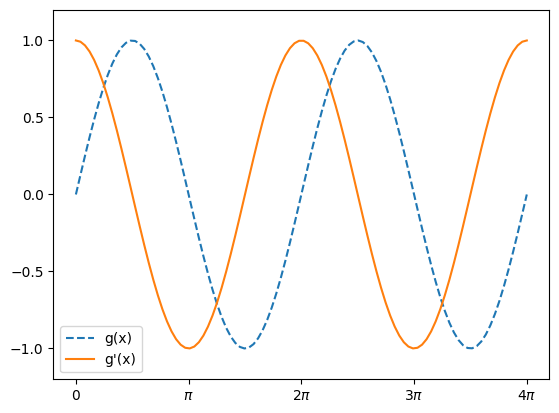

In [118]:
g = lambda x: np.sin(x)

dg = AutoDiff(g)
x = np.linspace(0, 4*np.pi, 100)

fig, ax = plt.subplots()
ax.plot(x, g(x), label='g(x)', ls='--')
ax.plot(x, dg.derivative(x), label="g'(x)")
ax.set_xticks([0, np.pi, 2*np.pi, 3*np.pi, 4*np.pi])
ax.set_xticklabels(['0', r'$\pi$', r'$2\pi$', r'$3\pi$', r'$4\pi$'])
ax.set_ylim(-1.2, 1.2)
ax.legend()

## 9. Summary

In this tutorial, we have explored the basics of Object Oriented Programming (OOP) in Python. We have seen how to define classes, how to create objects, and how to use inheritance and abstraction to re-use code and to make your code more readable and maintainable. We have also seen how to use data classes to create classes that are mainly used to store data.

Using classes during your RM project can help you to keep things ordered and enhance readability and maintainability of your code (both for you and your supervisors!). Splitting functionalities and logics in different classes also streamlines your mental process (avoid the `rm_2024.py` file with 100000+ lines of code). Additionally, classes help to re-use code in a very efficient way.

Using dataclasses can help you store data in a readable and maintainable way, and can be used to store data in a file (e.g. using the `pickle` module). 

In the next TSC lecture, we will see how to package your code and distribute it to other users.

## 10. References

- [Python documentation](https://docs.python.org/3/tutorial/classes.html)
- [Real Python](https://realpython.com/python-data-classes/)
- TSC Lecture, 2023, the von Karman Institute for Fluid Dynamics
- [A Primer on Scientific Programming with Python, H. P. Langtangen](https://wiki.physics.udel.edu/wiki_qttg/images/6/62/PETTER%3Dprimer_on_scientific_programming_with_python.pdf)